# K-Fold Cross Validation

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

## Importing theDataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the Dataset into the Training Set and Test Set

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Kernel SVM Model on the Training Set

In [5]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Making the Confusion Matrix

In [6]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


In [7]:
accuracy_score(y_test, y_pred)

0.93

## Applying K-Fold Cross Validation

K-Fold Cross Validation is a technique used to evaluate the performance of a machine learning model.

It is used to ensure that the model's performance is consistent and not dependent on a particular subset of the data.

K-Fold Cross Validation works by dividing the data into $K$ equally sized folds and using each fold as a validation set while the remaining folds are used as the training set.

#### Steps:
1. **Divide the Data**: Split the data into $K$ equally sized folds.

2. **Train and Validate**:
   - For each fold $i$:
     - **Train**: Use $K-1$ folds as the training set.
     - **Validate**: Use the remaining fold as the validation set.
     - **Evaluate**: Calculate the performance metric (e.g., accuracy, MSE) on the validation set.

3. **Compute the Average Performance**: Calculate the average performance metric across all $K$ folds.

#### Mathematical Formulas:

- **Performance Metric (e.g., Accuracy)**:
  $$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} $$

- **Average Performance**:
  $$ \text{Average Performance} = \frac{1}{K} \sum_{i=1}^{K} \text{Performance Metric}_i $$

Where $\text{Performance Metric}_i$ is the performance of the model on the $i$-th fold.

K-Fold Cross Validation ensures a robust evaluation by using multiple train-test splits, reducing the likelihood of overfitting or underfitting.

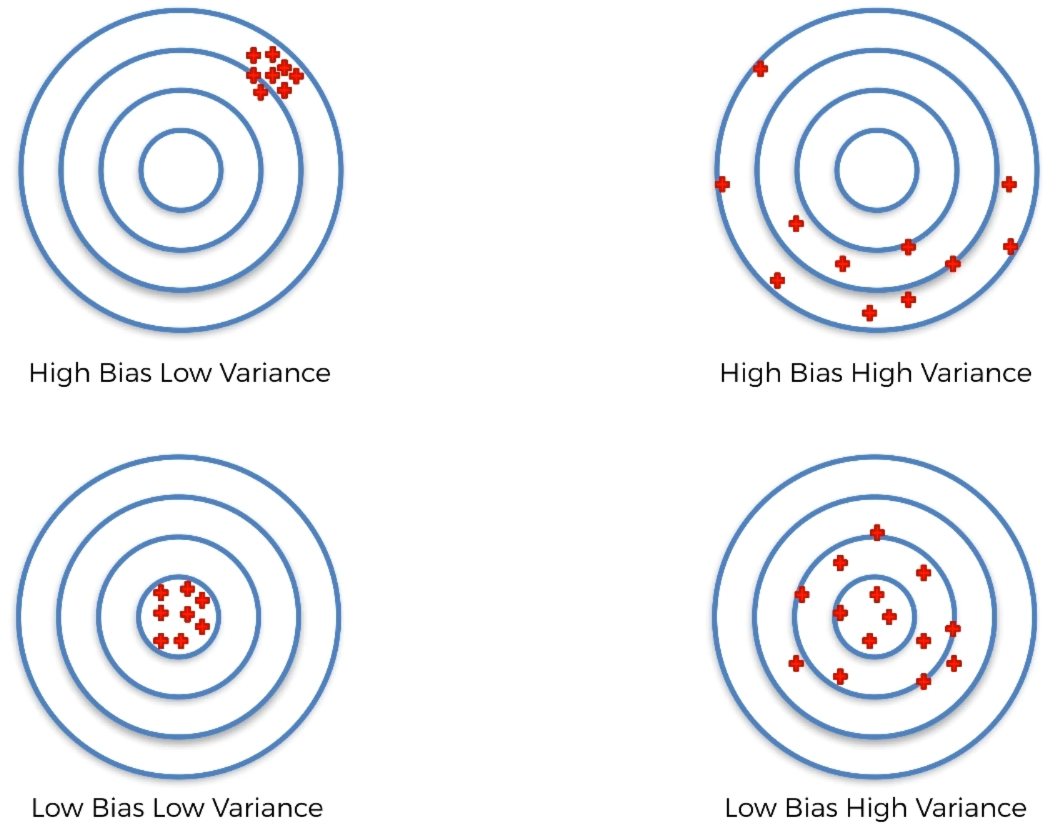

In [8]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs=-1)

In [13]:
for i, accuracy in enumerate(accuracies):
	print(f"Fold {i + 1} - Accuracy: {accuracy * 100:.2f} %")

Fold 1 - Accuracy: 80.00 %
Fold 2 - Accuracy: 96.67 %
Fold 3 - Accuracy: 80.00 %
Fold 4 - Accuracy: 96.67 %
Fold 5 - Accuracy: 86.67 %
Fold 6 - Accuracy: 86.67 %
Fold 7 - Accuracy: 90.00 %
Fold 8 - Accuracy: 93.33 %
Fold 9 - Accuracy: 100.00 %
Fold 10 - Accuracy: 93.33 %


In [9]:
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

Accuracy: 90.33 %
Standard Deviation: 6.57 %


## Visualising the Training Set Results

/tmp/ipykernel_17362/804694724.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


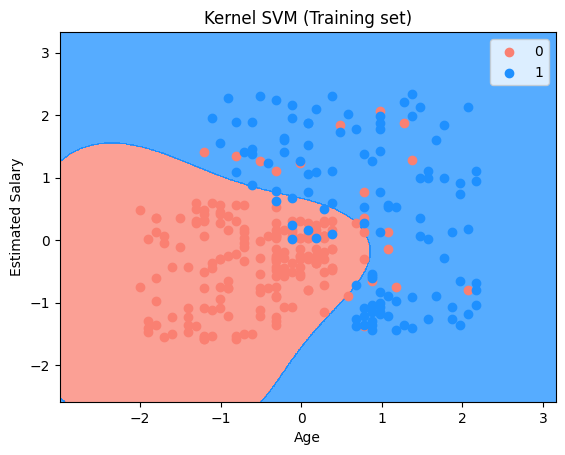

In [10]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test Set Results

/tmp/ipykernel_17362/728906215.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


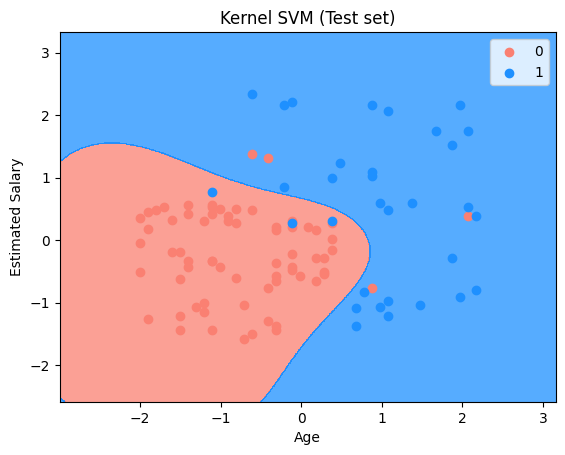

In [11]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()